In [4]:
from tensorflow.keras.models import Sequential  #모델 만들때
from tensorflow.keras.layers import Dense        # 모델 안에 layer 만들때
import numpy as np
import pandas as pd

In [5]:
Data_set = np.loadtxt("data3/ThoraricSurgery3.csv", delimiter=",") # numpy로 읽으면 배열형식으로 읽혀짐 
X = Data_set[:,0:16]
y = Data_set[:,16]  # 질병 여부 확인 데이터

In [6]:
Data_set

array([[ 1.  ,  2.88,  2.16, ...,  0.  , 60.  ,  0.  ],
       [ 2.  ,  3.4 ,  1.88, ...,  0.  , 51.  ,  0.  ],
       [ 2.  ,  2.76,  2.08, ...,  0.  , 59.  ,  0.  ],
       ...,
       [ 2.  ,  3.04,  2.08, ...,  0.  , 52.  ,  0.  ],
       [ 2.  ,  1.96,  1.68, ...,  0.  , 79.  ,  0.  ],
       [ 2.  ,  4.72,  3.56, ...,  0.  , 51.  ,  0.  ]])

In [7]:
Data_set.shape

(470, 17)

In [8]:
y   # 사망 =1 생존 =0

array([0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [9]:
model= Sequential()  # 객체 생성

In [10]:
model.add(Dense( 30, input_dim=16, activation='relu'))  # 히든층, 입력충, activation
model.add(Dense( 1 , activation='sigmoid'))  # 생존 사망 여부 확인 임으로 sigmoid, 생존 사망 여부 알고 싶으면 히든층 2로 설정 + softmax사용

In [14]:
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])  # 정해진 구문 

In [16]:
model.fit(X, y, epochs= 10, batch_size= 16)  # batch_size 너무 크게 해주면 메모리 이슈 발생 + 학습 잘 안될수 
                                            # 또한 너무 작으면 시간이 많이 걸림
    # 처음엔 weight가 랜덤 값임으로 매번 실행할때마다 loss, accuracy가 다르다 

Epoch 1/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8532
Epoch 2/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4141 - accuracy: 0.8511
Epoch 3/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4124 - accuracy: 0.8511
Epoch 4/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8553
Epoch 5/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4066 - accuracy: 0.8532
Epoch 6/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8532
Epoch 7/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4103 - accuracy: 0.8511
Epoch 8/10
30/30 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8511
Epoch 9/10
30/30 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8511
Epoch 10/10
30/30 [==============================] - 0s 1ms/step - loss: 0.3982 - accuracy: 0.8553


In [ ]:
model.predict()

In [18]:
#예측모델

In [19]:
x = np.array([2, 4, 6, 8])
y = np.array([81, 93, 91, 97])

In [20]:
mx = np.mean(x)

my = np.mean(y)

print("x의 평균값:", mx)
print("y의 평균값:", my)

x의 평균값: 5.0
y의 평균값: 90.5


In [22]:
x

array([2, 4, 6, 8])

In [23]:
divisor = sum([(i - mx)**2 for i in x])  # 평균과 각각의 데이터에대한 편차의 제곱의 합 -> RMSE 구하기
divisor

20.0

In [21]:
divisor = sum([(i - mx)**2 for i in x])
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)    # x데이터의 편차 * y데이터의 편차
    return d
dividend = top(x, mx, y, my)
print("분모:", divisor)
print("분자:", dividend)

분모: 20.0
분자: 46.0


In [24]:
a = dividend / divisor   # 기울기

In [25]:
b = my - (mx*a)   # y절편

In [26]:
print("기울기 a =", a)
print("y절편 b =", b)

기울기 a = 2.3
y절편 b = 79.0


In [27]:
def predict(x):
    return a * x + b   # 기울기에 x를 곱한다음 y절편 더한값을 돌려줌 , 회귀모델 = 2.3 * X + 79

In [28]:
predict_result = []

In [29]:
for i in range(len(x)):
    predict_result.append(predict(x[i]))
    print("공부시간=%.f, 실제점수=%.f, 예측점수=%.f" % (x[i], y[i], predict(x[i])))

공부시간=2, 실제점수=81, 예측점수=84
공부시간=4, 실제점수=93, 예측점수=88
공부시간=6, 실제점수=91, 예측점수=93
공부시간=8, 실제점수=97, 예측점수=97


In [30]:
import matplotlib.pyplot as plt

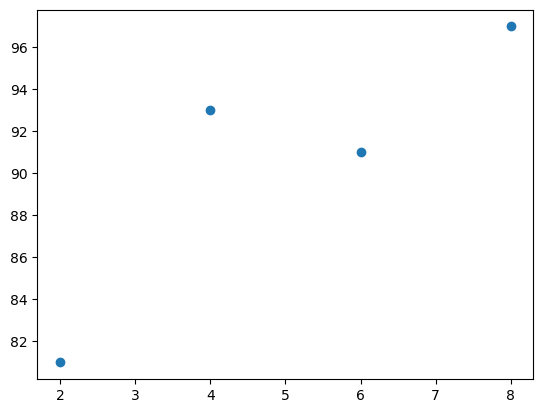

In [31]:
plt.scatter(x, y)
plt.show()

In [32]:
# 기울기 a와 절편 b의 값을 초기화합니다.
a = 0
b = 0

In [33]:
#학습률을 정합니다.
lr = 0.03

In [34]:
#몇 번 반복될지를 설정합니다. 
epochs = 2001

In [ ]:
x
a * x + b -> h(x)안에는 0*x+0 = [0,0,0,0]이 들어가고 원래 y 의값[81, 93, 91, 97]와 오차가 생김
y와 y hat 사이에 오차가 발생(error)
error= y-y hat 으로 두고 이를 => 1/4 * sum(square(error))  => cost(loss)

In [35]:
# x 값이 총 몇 개인지 셉니다.
n=len(x)

#경사 하강법을 시작합니다.
for i in range(epochs):                  # epoch 수 만큼 반복
    
    y_pred = a * x + b                   # 예측 값을 구하는 식입니다. -> x의 갯수는 4개 이므로 y_pred도 4개가 들어감
                                         # 1 epoch당 4건의 데이터 가지고 
    error = y - y_pred                   # 실제 값과 비교한 오차를 error로 놓습니다.
    
    a_diff = (2/n) * sum(-x * (error))   # 오차 함수를 a로 편미분한 값입니다. 
    b_diff = (2/n) * sum(-(error))       # 오차 함수를 b로 편미분한 값입니다. 
    
    a = a - lr * a_diff     # 학습률을 곱해 기존의 a 값을 업데이트합니다.
    b = b - lr * b_diff     # 학습률을 곱해 기존의 b 값을 업데이트합니다.
    
    if i % 100 == 0:        # 100번 반복될 때마다 현재의 a 값, b 값을 출력합니다.
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
# epoch이 작아짐에 따라 기울기 작아진다 -> 경사면 따라 내려옴으로 기울기가 점점 줄어듬 
# y절편은 커지다가 일정 값에 수렴

epoch=0, 기울기=27.8400, 절편=5.4300
epoch=100, 기울기=7.0739, 절편=50.5117
epoch=200, 기울기=4.0960, 절편=68.2822
epoch=300, 기울기=2.9757, 절편=74.9678
epoch=400, 기울기=2.5542, 절편=77.4830
epoch=500, 기울기=2.3956, 절편=78.4293
epoch=600, 기울기=2.3360, 절편=78.7853
epoch=700, 기울기=2.3135, 절편=78.9192
epoch=800, 기울기=2.3051, 절편=78.9696
epoch=900, 기울기=2.3019, 절편=78.9886
epoch=1000, 기울기=2.3007, 절편=78.9957
epoch=1100, 기울기=2.3003, 절편=78.9984
epoch=1200, 기울기=2.3001, 절편=78.9994
epoch=1300, 기울기=2.3000, 절편=78.9998
epoch=1400, 기울기=2.3000, 절편=78.9999
epoch=1500, 기울기=2.3000, 절편=79.0000
epoch=1600, 기울기=2.3000, 절편=79.0000
epoch=1700, 기울기=2.3000, 절편=79.0000
epoch=1800, 기울기=2.3000, 절편=79.0000
epoch=1900, 기울기=2.3000, 절편=79.0000
epoch=2000, 기울기=2.3000, 절편=79.0000


In [36]:
hx=a*x+b

In [38]:
hx # 모델의 예측값

array([83.59999984, 88.19999992, 92.8       , 97.40000008])

In [39]:
 y #실제값

array([81, 93, 91, 97])

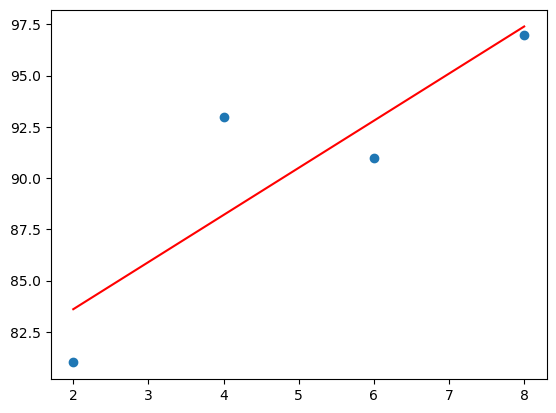

In [40]:
plt.scatter(x, y)
plt.plot(x, hx,'r')
plt.show()

In [41]:
# 로지스틱 회귀 모델 

In [42]:
x = np.array([2, 4, 6, 8, 10, 12, 14])
y = np.array([0, 0, 0, 1, 1, 1, 1])

In [43]:
model = Sequential()

In [44]:
model.add(Dense(1, input_dim=1, activation='sigmoid'))  # 1차원 임, 결과값이 0 or 1로 분류 함으로 Dense를 1로 줌 + sigmoid(0 or 1 로 분류함으로=이진분류)

In [46]:
model.compile(optimizer='sgd' ,loss='binary_crossentropy')  #sgd = 보편적인 경사하강법

In [47]:
model.fit(x, y, epochs=5000)

Epoch 1/5000
1/1 [==============================] - 0s 239ms/step - loss: 1.0647
Epoch 2/5000
1/1 [==============================] - 0s 6ms/step - loss: 1.0391
Epoch 3/5000
1/1 [==============================] - 0s 3ms/step - loss: 1.0139
Epoch 4/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.9890
Epoch 5/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.9645
Epoch 6/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.9404
Epoch 7/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.9168
Epoch 8/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8935
Epoch 9/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8708
Epoch 10/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8486
Epoch 11/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.8270
Epoch 12/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.8060
Epoch 13/5000
1/1 [============================

1/1 [==============================] - 0s 3ms/step - loss: 0.5170
Epoch 104/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5167
Epoch 105/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5165
Epoch 106/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.5163
Epoch 107/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5160
Epoch 108/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.5158
Epoch 109/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5155
Epoch 110/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5153
Epoch 111/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5151
Epoch 112/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5148
Epoch 113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.5146
Epoch 114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.5144
Epoch 115/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.4942
Epoch 205/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4939
Epoch 206/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4937
Epoch 207/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4935
Epoch 208/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4933
Epoch 209/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4931
Epoch 210/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4929
Epoch 211/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4926
Epoch 212/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4924
Epoch 213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4922
Epoch 214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4920
Epoch 215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4918
Epoch 216/5000
1/1 [=======================

1/1 [==============================] - 0s 6ms/step - loss: 0.4732
Epoch 306/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4730
Epoch 307/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4728
Epoch 308/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4726
Epoch 309/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4724
Epoch 310/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.4722
Epoch 311/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4720
Epoch 312/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4718
Epoch 313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4716
Epoch 314/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4714
Epoch 315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4712
Epoch 316/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4710
Epoch 317/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.4540
Epoch 407/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4538
Epoch 408/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4536
Epoch 409/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4534
Epoch 410/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4533
Epoch 411/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4531
Epoch 412/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4529
Epoch 413/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4527
Epoch 414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4525
Epoch 415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4523
Epoch 416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4522
Epoch 417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4520
Epoch 418/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.4363
Epoch 508/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4361
Epoch 509/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4360
Epoch 510/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4358
Epoch 511/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4356
Epoch 512/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4355
Epoch 513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4353
Epoch 514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4351
Epoch 515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4350
Epoch 516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4348
Epoch 517/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4346
Epoch 518/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4345
Epoch 519/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4200
Epoch 609/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4199
Epoch 610/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4197
Epoch 611/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4195
Epoch 612/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4194
Epoch 613/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.4192
Epoch 614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4191
Epoch 615/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4189
Epoch 616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4188
Epoch 617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4186
Epoch 618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4185
Epoch 619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4183
Epoch 620/5000
1/1 [=======================

1/1 [==============================] - 0s 2ms/step - loss: 0.4050
Epoch 710/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4048
Epoch 711/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4047
Epoch 712/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4046
Epoch 713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4044
Epoch 714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4043
Epoch 715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4041
Epoch 716/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.4040
Epoch 717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4039
Epoch 718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.4037
Epoch 719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4036
Epoch 720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.4034
Epoch 721/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3911
Epoch 811/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3910
Epoch 812/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3909
Epoch 813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3907
Epoch 814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3906
Epoch 815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3905
Epoch 816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3903
Epoch 817/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3902
Epoch 818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3901
Epoch 819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3899
Epoch 820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3898
Epoch 821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3897
Epoch 822/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3783
Epoch 912/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3782
Epoch 913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3781
Epoch 914/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3779
Epoch 915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3778
Epoch 916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3777
Epoch 917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3776
Epoch 918/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3774
Epoch 919/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3773
Epoch 920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3772
Epoch 921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3771
Epoch 922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3770
Epoch 923/5000
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 0.3664
Epoch 1013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3663
Epoch 1014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3662
Epoch 1015/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3661
Epoch 1016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3660
Epoch 1017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3658
Epoch 1018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3657
Epoch 1019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3656
Epoch 1020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3655
Epoch 1021/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3654
Epoch 1022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3653
Epoch 1023/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3652
Epoch 1024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3555
Epoch 1113/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3554
Epoch 1114/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3553
Epoch 1115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3552
Epoch 1116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3551
Epoch 1117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3550
Epoch 1118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3548
Epoch 1119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3547
Epoch 1120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3546
Epoch 1121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3545
Epoch 1122/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3544
Epoch 1123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3543
Epoch 1124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3453
Epoch 1213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3452
Epoch 1214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3451
Epoch 1215/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3450
Epoch 1216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3449
Epoch 1217/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3448
Epoch 1218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3447
Epoch 1219/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.3446
Epoch 1220/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.3445
Epoch 1221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3444
Epoch 1222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3443
Epoch 1223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3442
Epoch 1224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.3358
Epoch 1313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3357
Epoch 1314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3356
Epoch 1315/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3355
Epoch 1316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3355
Epoch 1317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3354
Epoch 1318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3353
Epoch 1319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3352
Epoch 1320/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3351
Epoch 1321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3350
Epoch 1322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3349
Epoch 1323/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3348
Epoch 1324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3270
Epoch 1413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3269
Epoch 1414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3268
Epoch 1415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3267
Epoch 1416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3266
Epoch 1417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3265
Epoch 1418/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3264
Epoch 1419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3264
Epoch 1420/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3263
Epoch 1421/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.3262
Epoch 1422/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3261
Epoch 1423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3260
Epoch 1424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3187
Epoch 1513/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3186
Epoch 1514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3185
Epoch 1515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3184
Epoch 1516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3183
Epoch 1517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3183
Epoch 1518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3182
Epoch 1519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3181
Epoch 1520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3180
Epoch 1521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3179
Epoch 1522/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3179
Epoch 1523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3178
Epoch 1524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.3109
Epoch 1613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3108
Epoch 1614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3107
Epoch 1615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3107
Epoch 1616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3106
Epoch 1617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3105
Epoch 1618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 1619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3104
Epoch 1620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3103
Epoch 1621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3102
Epoch 1622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3101
Epoch 1623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3101
Epoch 1624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.3036
Epoch 1713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3035
Epoch 1714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3034
Epoch 1715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3034
Epoch 1716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 1717/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3032
Epoch 1718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3032
Epoch 1719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3031
Epoch 1720/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.3030
Epoch 1721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3030
Epoch 1722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3029
Epoch 1723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.3028
Epoch 1724/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2967
Epoch 1813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2967
Epoch 1814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2966
Epoch 1815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2965
Epoch 1816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2965
Epoch 1817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2964
Epoch 1818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2963
Epoch 1819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2963
Epoch 1820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2962
Epoch 1821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2961
Epoch 1822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2961
Epoch 1823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2960
Epoch 1824/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2902
Epoch 1913/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2902
Epoch 1914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2901
Epoch 1915/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2901
Epoch 1916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2900
Epoch 1917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2899
Epoch 1918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2899
Epoch 1919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2898
Epoch 1920/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 1921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2897
Epoch 1922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2896
Epoch 1923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2896
Epoch 1924/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2841
Epoch 2013/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2841
Epoch 2014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2840
Epoch 2015/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2840
Epoch 2016/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2839
Epoch 2017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 2018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2838
Epoch 2019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2837
Epoch 2020/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2837
Epoch 2021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2836
Epoch 2022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 2023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2835
Epoch 2024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2784
Epoch 2113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 2114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2783
Epoch 2115/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2782
Epoch 2116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2781
Epoch 2117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2781
Epoch 2118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2780
Epoch 2119/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2780
Epoch 2120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2779
Epoch 2121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2779
Epoch 2122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2778
Epoch 2123/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2778
Epoch 2124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2729
Epoch 2213/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2728
Epoch 2214/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2728
Epoch 2215/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2727
Epoch 2216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2727
Epoch 2217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2726
Epoch 2218/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2726
Epoch 2219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2725
Epoch 2220/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2725
Epoch 2221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2724
Epoch 2222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2724
Epoch 2223/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2723
Epoch 2224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2677
Epoch 2313/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2677
Epoch 2314/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2676
Epoch 2315/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2676
Epoch 2316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2675
Epoch 2317/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 2318/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2674
Epoch 2319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2674
Epoch 2320/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2673
Epoch 2321/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2673
Epoch 2322/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2672
Epoch 2323/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2672
Epoch 2324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2628
Epoch 2413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2628
Epoch 2414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2627
Epoch 2415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2627
Epoch 2416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2626
Epoch 2417/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2626
Epoch 2418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2625
Epoch 2419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2625
Epoch 2420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 2421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2624
Epoch 2422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2623
Epoch 2423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2623
Epoch 2424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2581
Epoch 2513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2581
Epoch 2514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2580
Epoch 2515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2580
Epoch 2516/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2579
Epoch 2517/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2579
Epoch 2518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2579
Epoch 2519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2578
Epoch 2520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2578
Epoch 2521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2577
Epoch 2522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2577
Epoch 2523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2576
Epoch 2524/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2537
Epoch 2613/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2536
Epoch 2614/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 2615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2535
Epoch 2616/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2535
Epoch 2617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2535
Epoch 2618/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2534
Epoch 2619/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2534
Epoch 2620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2533
Epoch 2621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2533
Epoch 2622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2532
Epoch 2623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2532
Epoch 2624/5000
1/1 [===========

1/1 [==============================] - 0s 6ms/step - loss: 0.2494
Epoch 2713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2494
Epoch 2714/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2494
Epoch 2715/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2493
Epoch 2716/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2493
Epoch 2717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 2718/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2492
Epoch 2719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2491
Epoch 2720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2491
Epoch 2721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2491
Epoch 2722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2490
Epoch 2723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2490
Epoch 2724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 2813/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2454
Epoch 2814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2453
Epoch 2815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2453
Epoch 2816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2452
Epoch 2817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2452
Epoch 2818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2452
Epoch 2819/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2451
Epoch 2820/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2451
Epoch 2821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2450
Epoch 2822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2450
Epoch 2823/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2450
Epoch 2824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2415
Epoch 2913/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2415
Epoch 2914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2415
Epoch 2915/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2414
Epoch 2916/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2414
Epoch 2917/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2413
Epoch 2918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2413
Epoch 2919/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2413
Epoch 2920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2412
Epoch 2921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2412
Epoch 2922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2412
Epoch 2923/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2411
Epoch 2924/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2378
Epoch 3013/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2378
Epoch 3014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2378
Epoch 3015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2377
Epoch 3016/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2377
Epoch 3017/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2377
Epoch 3018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 3019/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2376
Epoch 3020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2375
Epoch 3021/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2375
Epoch 3022/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2375
Epoch 3023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2374
Epoch 3024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2343
Epoch 3113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2343
Epoch 3114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2342
Epoch 3115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2342
Epoch 3116/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2342
Epoch 3117/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2341
Epoch 3118/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2341
Epoch 3119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2341
Epoch 3120/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2340
Epoch 3121/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2340
Epoch 3122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2340
Epoch 3123/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2339
Epoch 3124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2309
Epoch 3213/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2309
Epoch 3214/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2308
Epoch 3215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2308
Epoch 3216/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2308
Epoch 3217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2307
Epoch 3218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2307
Epoch 3219/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2307
Epoch 3220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2306
Epoch 3221/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2306
Epoch 3222/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2306
Epoch 3223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2305
Epoch 3224/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2277
Epoch 3313/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2276
Epoch 3314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2276
Epoch 3315/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2276
Epoch 3316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2275
Epoch 3317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2275
Epoch 3318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2275
Epoch 3319/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2274
Epoch 3320/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2274
Epoch 3321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2274
Epoch 3322/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2273
Epoch 3323/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2273
Epoch 3324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2245
Epoch 3413/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2245
Epoch 3414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2245
Epoch 3415/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2244
Epoch 3416/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2244
Epoch 3417/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2244
Epoch 3418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2243
Epoch 3419/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2243
Epoch 3420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2243
Epoch 3421/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2243
Epoch 3422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2242
Epoch 3423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2242
Epoch 3424/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2215
Epoch 3513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2215
Epoch 3514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2215
Epoch 3515/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2214
Epoch 3516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2214
Epoch 3517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2214
Epoch 3518/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2214
Epoch 3519/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2213
Epoch 3520/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2213
Epoch 3521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2213
Epoch 3522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2212
Epoch 3523/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2212
Epoch 3524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2186
Epoch 3613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2186
Epoch 3614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2186
Epoch 3615/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2186
Epoch 3616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2185
Epoch 3617/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2185
Epoch 3618/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2185
Epoch 3619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2184
Epoch 3620/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2184
Epoch 3621/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2184
Epoch 3622/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2184
Epoch 3623/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2183
Epoch 3624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2159
Epoch 3713/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2158
Epoch 3714/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2158
Epoch 3715/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2158
Epoch 3716/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2158
Epoch 3717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2157
Epoch 3718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2157
Epoch 3719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2157
Epoch 3720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2156
Epoch 3721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2156
Epoch 3722/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2156
Epoch 3723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2156
Epoch 3724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.2132
Epoch 3813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2132
Epoch 3814/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2131
Epoch 3815/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2131
Epoch 3816/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2131
Epoch 3817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2131
Epoch 3818/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2130
Epoch 3819/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2130
Epoch 3820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2130
Epoch 3821/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2130
Epoch 3822/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2129
Epoch 3823/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2129
Epoch 3824/5000
1/1 [===========

1/1 [==============================] - 0s 5ms/step - loss: 0.2106
Epoch 3913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2106
Epoch 3914/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2106
Epoch 3915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2105
Epoch 3916/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2105
Epoch 3917/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2105
Epoch 3918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2105
Epoch 3919/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2104
Epoch 3920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2104
Epoch 3921/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2104
Epoch 3922/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2104
Epoch 3923/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2103
Epoch 3924/5000
1/1 [===========

1/1 [==============================] - 0s 4ms/step - loss: 0.2081
Epoch 4013/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2081
Epoch 4014/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2081
Epoch 4015/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2080
Epoch 4016/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2080
Epoch 4017/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2080
Epoch 4018/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2080
Epoch 4019/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2079
Epoch 4020/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2079
Epoch 4021/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2079
Epoch 4022/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2079
Epoch 4023/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2079
Epoch 4024/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2057
Epoch 4113/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2057
Epoch 4114/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2057
Epoch 4115/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2056
Epoch 4116/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2056
Epoch 4117/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2056
Epoch 4118/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2056
Epoch 4119/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2055
Epoch 4120/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2055
Epoch 4121/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2055
Epoch 4122/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2055
Epoch 4123/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2055
Epoch 4124/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2034
Epoch 4213/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2034
Epoch 4214/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2033
Epoch 4215/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2033
Epoch 4216/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2033
Epoch 4217/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2033
Epoch 4218/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2033
Epoch 4219/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2032
Epoch 4220/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2032
Epoch 4221/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2032
Epoch 4222/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2032
Epoch 4223/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2031
Epoch 4224/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.2011
Epoch 4313/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.2011
Epoch 4314/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2011
Epoch 4315/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.2011
Epoch 4316/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2011
Epoch 4317/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2010
Epoch 4318/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2010
Epoch 4319/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2010
Epoch 4320/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.2010
Epoch 4321/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 4322/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.2009
Epoch 4323/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.2009
Epoch 4324/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1990
Epoch 4413/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1989
Epoch 4414/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1989
Epoch 4415/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1989
Epoch 4416/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1989
Epoch 4417/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1989
Epoch 4418/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1988
Epoch 4419/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1988
Epoch 4420/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1988
Epoch 4421/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1988
Epoch 4422/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1988
Epoch 4423/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1987
Epoch 4424/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1969
Epoch 4513/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1968
Epoch 4514/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1968
Epoch 4515/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1968
Epoch 4516/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1968
Epoch 4517/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1968
Epoch 4518/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1967
Epoch 4519/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1967
Epoch 4520/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1967
Epoch 4521/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1967
Epoch 4522/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1967
Epoch 4523/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.1966
Epoch 4524/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1948
Epoch 4613/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1948
Epoch 4614/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1948
Epoch 4615/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1948
Epoch 4616/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1947
Epoch 4617/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1947
Epoch 4618/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1947
Epoch 4619/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1947
Epoch 4620/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1947
Epoch 4621/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1946
Epoch 4622/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1946
Epoch 4623/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1946
Epoch 4624/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1928
Epoch 4713/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1928
Epoch 4714/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1928
Epoch 4715/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1928
Epoch 4716/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1928
Epoch 4717/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1927
Epoch 4718/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1927
Epoch 4719/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1927
Epoch 4720/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1927
Epoch 4721/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1927
Epoch 4722/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1926
Epoch 4723/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1926
Epoch 4724/5000
1/1 [===========

1/1 [==============================] - 0s 2ms/step - loss: 0.1909
Epoch 4813/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1909
Epoch 4814/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1909
Epoch 4815/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1909
Epoch 4816/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1908
Epoch 4817/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 4818/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1908
Epoch 4819/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1908
Epoch 4820/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 4821/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1908
Epoch 4822/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1907
Epoch 4823/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1907
Epoch 4824/5000
1/1 [===========

1/1 [==============================] - 0s 3ms/step - loss: 0.1891
Epoch 4913/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1890
Epoch 4914/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1890
Epoch 4915/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1890
Epoch 4916/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.1890
Epoch 4917/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1890
Epoch 4918/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1889
Epoch 4919/5000
1/1 [==============================] - 0s 4ms/step - loss: 0.1889
Epoch 4920/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1889
Epoch 4921/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 4922/5000
1/1 [==============================] - 0s 3ms/step - loss: 0.1889
Epoch 4923/5000
1/1 [==============================] - 0s 2ms/step - loss: 0.1889
Epoch 4924/5000
1/1 [===========

1/1 [==============================] - 0s 60ms/step


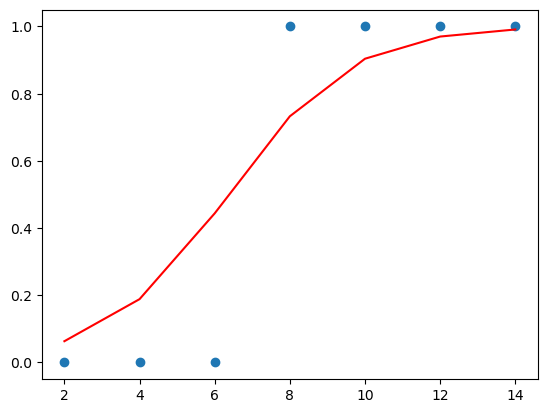

In [48]:
plt.scatter(x, y)  #실제값
plt.plot(x, model.predict(x),'r')  # 예측값 선으로 이은것
plt.show()
# 0.5 기준 아래쪽은 불합격, 이상은 합격 -> 6시간 30분(x값) 기준으로 나눠질듯

In [51]:
model.predict([7])*100  # 7시간 공부했을때 예측값 -> x 값들이 리스트로 담겨있었으므로 리스트로 넣어줌 
model.predict([7])[0][0]*100  #값만 뽑기 위해 

1/1 [==============================] - 0s 29ms/step


59.66223478317261

In [52]:
if model.predict([7])[0][0]*100 > 50 : 
    print('합격으로 예상')
else: 
    print('불합격으로 예상')

1/1 [==============================] - 0s 30ms/step
합격으로 예상


In [ ]:
#다층 퍼셉트론
# -> 퍼셉트론 : 입력값을 입력받아 결과값을 도출해내는 역할
#다층 퍼셉트론 : 여러개의 퍼셉트론들이 연결됨

In [64]:
# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [65]:
# 0 1 1 1 을 출력할수있는 함수 만들기 
def NAND(x1,x2):
    return MLP(np.array([x1, x2]), w11, b1)
def XOR(x1, x2):
    pass
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)
def OR(x1, x2) :  
    return MLP(np.array([x1, x2]), w12, b2)
def XOR(x1,x2):
    return AND(NAND(x1, x2),OR(x1,x2))

In [66]:
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    #print(x)
    #y=OR(x[0],x[1]) #0 1 1 1   
    #y=AND(x[0],x[1]) #0 0 0 1         #OR 퍼셉트론 만들기
    y=XOR(x[0],x[1])   #0 1 1 0
    print(y)

0
1
1
0


In [ ]:
# XOR은 한개의 퍼셉트론으로 해결 안됨 -여러개의 퍼셉트론으로 해결 해야하며 이를 다층 퍼셉트론이라한다
# 다층 퍼셉트론 = 딥러닝 이라 할수 있다

In [67]:
import seaborn as sns

In [69]:
df = pd.read_csv('data3/pima-indians-diabetes3.csv')

In [70]:
df.head(5)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [72]:
df['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [73]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [74]:
df.corr()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
pregnant,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plasma,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


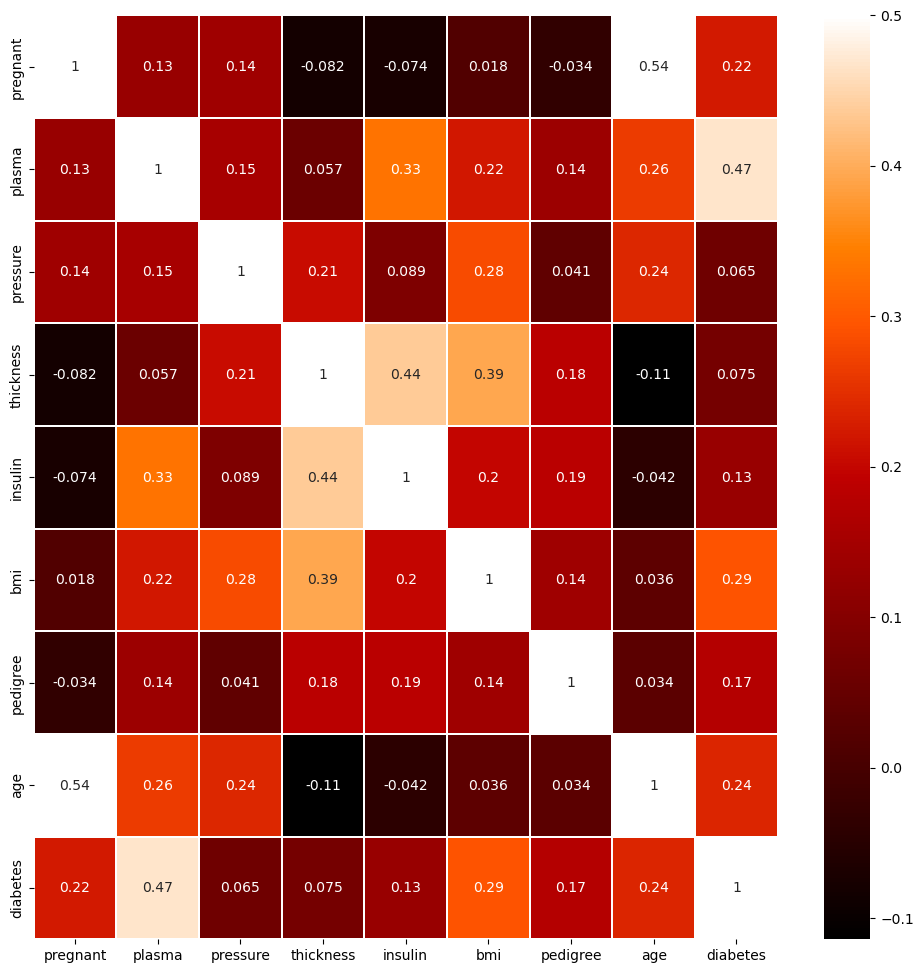

In [75]:
colormap = plt.cm.gist_heat   
plt.figure(figsize=(12,12))  
sns.heatmap(df.corr(),linewidths=0.1,vmax=0.5, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [76]:
df.plasma

0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: plasma, Length: 768, dtype: int64

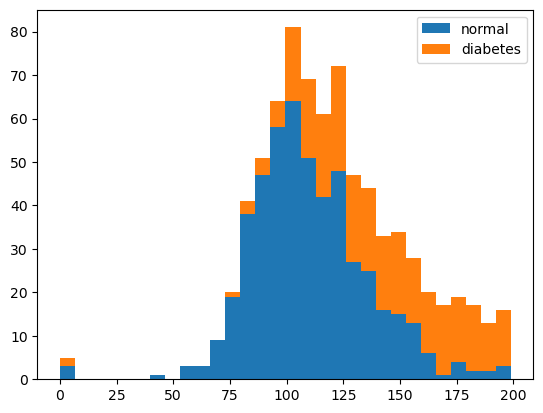

In [77]:
plt.hist(x=[df.plasma[df.diabetes==0], df.plasma[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

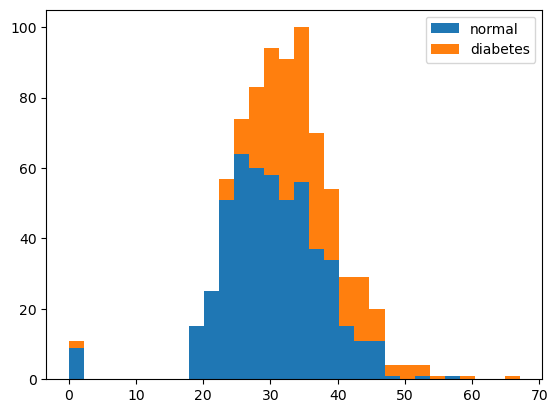

In [78]:
plt.hist(x=[df.bmi[df.diabetes==0], df.bmi[df.diabetes==1]], bins=30, histtype='barstacked', label=['normal','diabetes'])
plt.legend()

In [79]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [82]:
X
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

In [106]:
model=Sequential()

In [107]:
model.add(Dense(30, input_dim=8, activation='relu', name='Dense_1'))
model.add(Dense(10, activation='relu', name='Dense_2'))
model.add(Dense(1, activation='sigmoid',name='Dense_3'))

In [108]:
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense_1 (Dense)             (None, 30)                270       
                                                                 
 Dense_2 (Dense)             (None, 10)                310       
                                                                 
 Dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 591 (2.31 KB)
Trainable params: 591 (2.31 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [109]:
model.fit(X, y, epochs=100, batch_size=5)

Epoch 1/100
154/154 [==============================] - 1s 1ms/step - loss: 1.9842 - accuracy: 0.5638
Epoch 2/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7932 - accuracy: 0.6003
Epoch 3/100
154/154 [==============================] - 0s 1ms/step - loss: 0.7285 - accuracy: 0.6432
Epoch 4/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6964 - accuracy: 0.6445
Epoch 5/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6770 - accuracy: 0.6589
Epoch 6/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6481 - accuracy: 0.6810
Epoch 7/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6484 - accuracy: 0.6784
Epoch 8/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6341 - accuracy: 0.6862
Epoch 9/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6271 - accuracy: 0.6953
Epoch 10/100
154/154 [==============================] - 0s 1ms/step - loss: 0.6295 - accura

154/154 [==============================] - 0s 1ms/step - loss: 0.4787 - accuracy: 0.7734
Epoch 82/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7734
Epoch 83/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4876 - accuracy: 0.7643
Epoch 84/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4892 - accuracy: 0.7773
Epoch 85/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4774 - accuracy: 0.7943
Epoch 86/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4920 - accuracy: 0.7695
Epoch 87/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4953 - accuracy: 0.7526
Epoch 88/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.7708
Epoch 89/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4833 - accuracy: 0.7839
Epoch 90/100
154/154 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 

In [111]:
df=pd.read_csv('data3/sonar3.csv',header=None)

In [112]:
#암석=0, 광석=1
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


In [114]:
df[60].value_counts()

1    111
0     97
Name: 60, dtype: int64

In [115]:
X = df.iloc[:,0:60]
y = df.iloc[:,60]

In [116]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))   

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X, y, epochs=200, batch_size=10)

Epoch 1/200
21/21 [==============================] - 1s 1ms/step - loss: 0.7149 - accuracy: 0.4615
Epoch 2/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6835 - accuracy: 0.5962
Epoch 3/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6732 - accuracy: 0.5865
Epoch 4/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6634 - accuracy: 0.6394
Epoch 5/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6521 - accuracy: 0.6923
Epoch 6/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6412 - accuracy: 0.7067
Epoch 7/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6272 - accuracy: 0.7308
Epoch 8/200
21/21 [==============================] - 0s 1ms/step - loss: 0.6129 - accuracy: 0.7308
Epoch 9/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5980 - accuracy: 0.7356
Epoch 10/200
21/21 [==============================] - 0s 1ms/step - loss: 0.5792 - accuracy: 0.7500
Epoch 11/

21/21 [==============================] - 0s 1ms/step - loss: 0.1836 - accuracy: 0.9423
Epoch 84/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1802 - accuracy: 0.9471
Epoch 85/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1693 - accuracy: 0.9519
Epoch 86/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1758 - accuracy: 0.9423
Epoch 87/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1638 - accuracy: 0.9471
Epoch 88/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1643 - accuracy: 0.9567
Epoch 89/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1582 - accuracy: 0.9519
Epoch 90/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1630 - accuracy: 0.9471
Epoch 91/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1563 - accuracy: 0.9519
Epoch 92/200
21/21 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9615
Epoch 93/200


21/21 [==============================] - 0s 1ms/step - loss: 0.0514 - accuracy: 0.9952
Epoch 165/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0458 - accuracy: 0.9952
Epoch 166/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0460 - accuracy: 0.9952
Epoch 167/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0420 - accuracy: 0.9952
Epoch 168/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0422 - accuracy: 0.9952
Epoch 169/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0418 - accuracy: 0.9952
Epoch 170/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0406 - accuracy: 0.9952
Epoch 171/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0398 - accuracy: 0.9952
Epoch 172/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0409 - accuracy: 1.0000
Epoch 173/200
21/21 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 1.0000
Epoc

In [117]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

import pandas as pd

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [119]:
X_train.shape

(145, 60)

In [120]:
y_train

12     0
123    1
150    1
59     0
69     0
      ..
160    1
191    1
16     0
153    1
19     0
Name: 60, Length: 145, dtype: int64

In [122]:
y_train.value_counts()

1    78
0    67
Name: 60, dtype: int64

In [ ]:
#1과0이 train(7:3),test(7;3)비율로 들어감

In [123]:
model = Sequential()
model.add(Dense(24,  input_dim=60, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [124]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=200, batch_size=10)

Epoch 1/200
15/15 [==============================] - 1s 1ms/step - loss: 0.6960 - accuracy: 0.5379
Epoch 2/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6699 - accuracy: 0.5655
Epoch 3/200
15/15 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.6483
Epoch 4/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6380 - accuracy: 0.6759
Epoch 5/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6250 - accuracy: 0.6897
Epoch 6/200
15/15 [==============================] - 0s 1ms/step - loss: 0.6110 - accuracy: 0.7448
Epoch 7/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5931 - accuracy: 0.7655
Epoch 8/200
15/15 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7655
Epoch 9/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5668 - accuracy: 0.7862
Epoch 10/200
15/15 [==============================] - 0s 1ms/step - loss: 0.5525 - accuracy: 0.7655
Epoch 11/

15/15 [==============================] - 0s 1ms/step - loss: 0.1627 - accuracy: 0.9517
Epoch 84/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1575 - accuracy: 0.9655
Epoch 85/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1587 - accuracy: 0.9724
Epoch 86/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1548 - accuracy: 0.9655
Epoch 87/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1651 - accuracy: 0.9379
Epoch 88/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1513 - accuracy: 0.9517
Epoch 89/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1509 - accuracy: 0.9379
Epoch 90/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.9793
Epoch 91/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1435 - accuracy: 0.9724
Epoch 92/200
15/15 [==============================] - 0s 1ms/step - loss: 0.1411 - accuracy: 0.9586
Epoch 93/200


15/15 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9862
Epoch 165/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0412 - accuracy: 1.0000
Epoch 166/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 1.0000
Epoch 167/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0380 - accuracy: 1.0000
Epoch 168/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0397 - accuracy: 1.0000
Epoch 169/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0384 - accuracy: 1.0000
Epoch 170/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0371 - accuracy: 1.0000
Epoch 171/200
15/15 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 1.0000
Epoch 172/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 1.0000
Epoch 173/200
15/15 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 1.0000
Epoc

In [130]:
score=model.evaluate(X_test, y_test)
score[1]  # score의 [1]이 모델의 정확도     
# train에 대해 정확도는 1이 나오는데 test에 대해서는 정확도가 낮게 나옴으로 이는 오버피팅이다.

2/2 [==============================] - 0s 3ms/step - loss: 1.0582 - accuracy: 0.7143


0.7142857313156128

In [131]:
model.save('myModel.hdf5') #저장된 파일을 서버에다가 올리고 외부에서입력 받은 데이터를 이모델에다 전달받아 predict한 결과를 도출

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [132]:
del model

In [134]:
# model.evaluate(X_test,y_test)  #모델 제거되서 에러

In [135]:
myModel=load_model('myModel.hdf5')  #모델 불러오기 ( 사전 학습된 모델  : pretrained model)

In [136]:
myModel.evaluate(X_test,y_test) 

2/2 [==============================] - 0s 3ms/step - loss: 1.0582 - accuracy: 0.7143


[1.058190107345581, 0.7142857313156128]

In [ ]:
# myModel.predict([xdata]) # 모델에다가 데이터 넣으면 예측값 나온다.

In [138]:
# myModel : 광산/암산 구분 모델 (사전 학습된 모델)

In [ ]:
# 해저 천연자원(가스) 탐사 프로젝트 
# 데이터 구성되어 있음
# myModel ->  불러오기 -> + 해저 천연 자원 데이터 추가학습 -> 모델 : 전이학습(파인튜닝)

In [176]:
df = pd.read_csv('data3/wine.csv', header=None)

In [177]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [178]:
X = df.iloc[:,0:12]
y = df.iloc[:,12]

In [165]:
y.value_counts()

0    4898
1    1599
Name: 12, dtype: int64

In [144]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [145]:
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                390       
                                                                 
 dense_10 (Dense)            (None, 12)                372       
                                                                 
 dense_11 (Dense)            (None, 8)                 104       
                                                                 
 dense_12 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
6497건 데이터를 8:2 비율로 나눔

train(80)                        test(20)
train(0.75) / validation(0.25)       

In [146]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [148]:
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25) # 0.8 x 0.25 = 0.2
#6497건 데이터를 8:2 비율로 나눔

#train(80)                        test(20)
#train(0.75) / validation(0.25)       

Epoch 1/50
8/8 [==============================] - 0s 10ms/step - loss: 0.1687 - accuracy: 0.9389 - val_loss: 0.1672 - val_accuracy: 0.9446
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1677 - accuracy: 0.9420 - val_loss: 0.1667 - val_accuracy: 0.9454
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1661 - accuracy: 0.9405 - val_loss: 0.1642 - val_accuracy: 0.9454
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1639 - accuracy: 0.9438 - val_loss: 0.1636 - val_accuracy: 0.9446
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1617 - accuracy: 0.9423 - val_loss: 0.1612 - val_accuracy: 0.9462
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1600 - accuracy: 0.9451 - val_loss: 0.1604 - val_accuracy: 0.9454
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.1583 - accuracy: 0.9451 - val_loss: 0.1577 - val_accuracy: 0.9477
Epoch 8/50
8/8 [=================

In [150]:
model.evaluate(X_test,y_test)[1]  #모델의 정확도는 이거임
#위에서 마지막 epoch이 끝난 모델이 여기 해당 모델 이다.


41/41 [==============================] - 0s 1ms/step - loss: 0.1431 - accuracy: 0.9508


0.9507692456245422

In [179]:
X
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [180]:
# 모델의 최적 상태 저장 

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 30)                390       
                                                                 
 dense_26 (Dense)            (None, 12)                372       
                                                                 
 dense_27 (Dense)            (None, 8)                 104       
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
modelpath="./data/model/all/{epoch:02d}-{val_accuracy:.4f}.hdf5"  # 모델 저장 하기 위한 경로

In [183]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [184]:
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)  #verbose = 출력할때 출력옵션( 0 으로두면 메세지 안나옴)

In [185]:
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])
# 모델 실행할때마다 저장함 
# callbacks : 어떤 일정한 상황이 되면 자동으로 호출하는 함수
# 모델이 성능이 좋아졌을때만 저장하고 안좋아 졌을때는 스킵 할수있음


Epoch 1: saving model to ./data/model/all\01-0.8662.hdf5

Epoch 2: saving model to ./data/model/all\02-0.8700.hdf5

Epoch 3: saving model to ./data/model/all\03-0.9077.hdf5

Epoch 4: saving model to ./data/model/all\04-0.9331.hdf5


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 5: saving model to ./data/model/all\05-0.9346.hdf5

Epoch 6: saving model to ./data/model/all\06-0.9377.hdf5

Epoch 7: saving model to ./data/model/all\07-0.9392.hdf5

Epoch 8: saving model to ./data/model/all\08-0.9385.hdf5

Epoch 9: saving model to ./data/model/all\09-0.9377.hdf5

Epoch 10: saving model to ./data/model/all\10-0.9369.hdf5

Epoch 11: saving model to ./data/model/all\11-0.9377.hdf5

Epoch 12: saving model to ./data/model/all\12-0.9385.hdf5

Epoch 13: saving model to ./data/model/all\13-0.9369.hdf5

Epoch 14: saving model to ./data/model/all\14-0.9392.hdf5

Epoch 15: saving model to ./data/model/all\15-0.9392.hdf5

Epoch 16: saving model to ./data/model/all\16-0.9400.hdf5

Epoch 17: saving model to ./data/model/all\17-0.9408.hdf5

Epoch 18: saving model to ./data/model/all\18-0.9408.hdf5

Epoch 19: saving model to ./data/model/all\19-0.9415.hdf5

Epoch 20: saving model to ./data/model/all\20-0.9431.hdf5

Epoch 21: saving model to ./data/model/all\21-0.9423.hdf5

E

In [186]:
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 [==============================] - 0s 1ms/step - loss: 0.1277 - accuracy: 0.9523
Test accuracy: 0.9523077011108398


In [187]:
#변수에 저장하면 매 epoch때 마다 로스(코스트)나 정확도 val_loss val_accuracy를 알수 있다
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, verbose=0, validation_split=0.25)

In [188]:
#변수에 저장하면 매 epoch때 마다 로스나 정확도 val_loss val_accuracy를 알수 있다
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,0.110997,0.960739,0.112268,0.963846
1,0.109838,0.963562,0.110773,0.960000
2,0.110820,0.962279,0.109335,0.960769
3,0.108562,0.962535,0.108804,0.963077
4,0.107364,0.962792,0.109826,0.958462
...,...,...,...,...
1995,0.026713,0.993841,0.049248,0.986923
1996,0.025778,0.994098,0.050291,0.988462
1997,0.025888,0.993585,0.050566,0.986923
1998,0.026436,0.992815,0.057104,0.988462


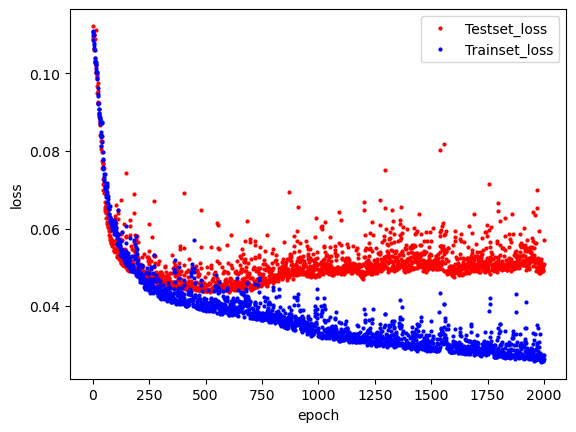

In [189]:
y_vloss=hist_df['val_loss']
y_loss=hist_df['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, "o", c="red", markersize=2, label='Testset_loss')
plt.plot(x_len, y_loss, "o", c="blue", markersize=2, label='Trainset_loss')

plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# validation data에 대한 loss가 더이상 나이질 기미가 없이 loss 가 올라가고 정확도가 낮아지는 시점이 있는데 그 이전에 중단하는게 좋다
# = early stop 옵션 있음, patience 옵션은 참는 횟수 (올라가는 횟수에 따라 몇번까지 참을지 지정 가능)
# 가장 좋은 모델은 올라가기 직전의 모델이고 model_checkpointer을 이용해서 직전의 모델을 저장해줌
# 위 그래프에서는 testset_loss 

In [190]:
###학습 자동 중단###

In [192]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping   #checkpoint와 Earlystop은 같이 쓰인다.
import os
import pandas as pd

# 데이터를 입력합니다.
df = pd.read_csv('data3/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 30)                390       
                                                                 
 dense_30 (Dense)            (None, 12)                372       
                                                                 
 dense_31 (Dense)            (None, 8)                 104       
                                                                 
 dense_32 (Dense)            (None, 1)                 9         
                                                                 
Total params: 875 (3.42 KB)
Trainable params: 875 (3.42 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [193]:
# 학습이 언제 자동 중단 될지를 설정합니다.
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20)   # val_loss를 설정한거 = 평가 항목 (val_loss기준 20번 참아서 안좋아지면 중단해라)

#최적화 모델이 저장될 폴더와 모델의 이름을 정합니다.
modelpath="./data/model/Ch14-4-bestmodel.hdf5"

# 최적화 모델을 업데이트하고 저장합니다.
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)  #save_best_only=True 설정해줘서 최적의 모델을 저장해줌 꼭 써야함

#모델을 실행합니다.
history=model.fit(X_train, y_train, epochs=2000, batch_size=500, validation_split=0.25, verbose=1, 
                  callbacks=[early_stopping_callback,checkpointer])

Epoch 1/2000
8/8 [==============================] - 1s 22ms/step - loss: 24.5188 - accuracy: 0.2456 - val_loss: 21.4681 - val_accuracy: 0.2477
Epoch 2/2000
8/8 [==============================] - 0s 8ms/step - loss: 18.8028 - accuracy: 0.2456 - val_loss: 15.6481 - val_accuracy: 0.2477
Epoch 3/2000
8/8 [==============================] - 0s 8ms/step - loss: 12.9562 - accuracy: 0.2456 - val_loss: 9.9648 - val_accuracy: 0.2477
Epoch 4/2000
8/8 [==============================] - 0s 8ms/step - loss: 7.7627 - accuracy: 0.2320 - val_loss: 4.7956 - val_accuracy: 0.1769


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 5/2000
8/8 [==============================] - 0s 8ms/step - loss: 2.7408 - accuracy: 0.2546 - val_loss: 0.7377 - val_accuracy: 0.6308
Epoch 6/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.5585 - accuracy: 0.7596 - val_loss: 0.4607 - val_accuracy: 0.8269
Epoch 7/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.3882 - accuracy: 0.8560 - val_loss: 0.3267 - val_accuracy: 0.8700
Epoch 8/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.3241 - accuracy: 0.8494 - val_loss: 0.3277 - val_accuracy: 0.8446
Epoch 9/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.2804 - accuracy: 0.8709 - val_loss: 0.2647 - val_accuracy: 0.9038
Epoch 10/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.2504 - accuracy: 0.9017 - val_loss: 0.2447 - val_accuracy: 0.9085
Epoch 11/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.2354 - accuracy: 0.9056 - val_loss: 0.2309 - val_accuracy: 0.9154
Epoch 12/2000
8/8 

8/8 [==============================] - 0s 8ms/step - loss: 0.1267 - accuracy: 0.9533 - val_loss: 0.1104 - val_accuracy: 0.9592
Epoch 64/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1251 - accuracy: 0.9525 - val_loss: 0.1083 - val_accuracy: 0.9600
Epoch 65/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1234 - accuracy: 0.9538 - val_loss: 0.1058 - val_accuracy: 0.9646
Epoch 66/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1220 - accuracy: 0.9551 - val_loss: 0.1054 - val_accuracy: 0.9600
Epoch 67/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.1224 - accuracy: 0.9569 - val_loss: 0.1162 - val_accuracy: 0.9546
Epoch 68/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1201 - accuracy: 0.9589 - val_loss: 0.1014 - val_accuracy: 0.9615
Epoch 69/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.1178 - accuracy: 0.9566 - val_loss: 0.0992 - val_accuracy: 0.9692
Epoch 70/2000
8/8 [========

8/8 [==============================] - 0s 5ms/step - loss: 0.0776 - accuracy: 0.9761 - val_loss: 0.0611 - val_accuracy: 0.9815
Epoch 122/2000
8/8 [==============================] - 0s 10ms/step - loss: 0.0769 - accuracy: 0.9766 - val_loss: 0.0586 - val_accuracy: 0.9838
Epoch 123/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0762 - accuracy: 0.9774 - val_loss: 0.0677 - val_accuracy: 0.9792
Epoch 124/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0783 - accuracy: 0.9766 - val_loss: 0.0651 - val_accuracy: 0.9792
Epoch 125/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0777 - accuracy: 0.9751 - val_loss: 0.0576 - val_accuracy: 0.9823
Epoch 126/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0745 - accuracy: 0.9766 - val_loss: 0.0576 - val_accuracy: 0.9831
Epoch 127/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0743 - accuracy: 0.9769 - val_loss: 0.0573 - val_accuracy: 0.9831
Epoch 128/2000
8/8 [

Epoch 179/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0617 - accuracy: 0.9808 - val_loss: 0.0477 - val_accuracy: 0.9854
Epoch 180/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0623 - accuracy: 0.9813 - val_loss: 0.0474 - val_accuracy: 0.9869
Epoch 181/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0622 - accuracy: 0.9813 - val_loss: 0.0451 - val_accuracy: 0.9862
Epoch 182/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.0649 - accuracy: 0.9815 - val_loss: 0.0446 - val_accuracy: 0.9862
Epoch 183/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0641 - accuracy: 0.9815 - val_loss: 0.0493 - val_accuracy: 0.9869
Epoch 184/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0604 - accuracy: 0.9818 - val_loss: 0.0441 - val_accuracy: 0.9862
Epoch 185/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0608 - accuracy: 0.9818 - val_loss: 0.0465 - val_accuracy: 0.9854
Epoch 

Epoch 237/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0402 - val_accuracy: 0.9862
Epoch 238/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0570 - accuracy: 0.9820 - val_loss: 0.0429 - val_accuracy: 0.9869
Epoch 239/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0567 - accuracy: 0.9831 - val_loss: 0.0412 - val_accuracy: 0.9869
Epoch 240/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0546 - accuracy: 0.9828 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 241/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0547 - accuracy: 0.9833 - val_loss: 0.0405 - val_accuracy: 0.9869
Epoch 242/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0396 - val_accuracy: 0.9877
Epoch 243/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0540 - accuracy: 0.9831 - val_loss: 0.0404 - val_accuracy: 0.9877
Epoch 

Epoch 295/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0539 - accuracy: 0.9833 - val_loss: 0.0369 - val_accuracy: 0.9885
Epoch 296/2000
8/8 [==============================] - 0s 8ms/step - loss: 0.0511 - accuracy: 0.9838 - val_loss: 0.0355 - val_accuracy: 0.9877
Epoch 297/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0513 - accuracy: 0.9849 - val_loss: 0.0389 - val_accuracy: 0.9877
Epoch 298/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0530 - accuracy: 0.9833 - val_loss: 0.0362 - val_accuracy: 0.9877
Epoch 299/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9826 - val_loss: 0.0367 - val_accuracy: 0.9877
Epoch 300/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0513 - accuracy: 0.9836 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 301/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0502 - accuracy: 0.9838 - val_loss: 0.0360 - val_accuracy: 0.9869
Epoch 

Epoch 353/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.0333 - val_accuracy: 0.9892
Epoch 354/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0509 - accuracy: 0.9838 - val_loss: 0.0378 - val_accuracy: 0.9892
Epoch 355/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0495 - accuracy: 0.9859 - val_loss: 0.0353 - val_accuracy: 0.9885
Epoch 356/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0484 - accuracy: 0.9841 - val_loss: 0.0334 - val_accuracy: 0.9885
Epoch 357/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0479 - accuracy: 0.9849 - val_loss: 0.0364 - val_accuracy: 0.9892
Epoch 358/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0503 - accuracy: 0.9846 - val_loss: 0.0423 - val_accuracy: 0.9877
Epoch 359/2000
8/8 [==============================] - 0s 5ms/step - loss: 0.0539 - accuracy: 0.9823 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 

In [194]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 1ms/step - loss: 0.0702 - accuracy: 0.9815


[0.07018165290355682, 0.9815384745597839]

In [349]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping   #checkpoint와 Earlystop은 같이 쓰인다.
import os
import pandas as pd

In [407]:
df=pd.read_csv('wdbc.data',header=None)
df
#B(양) : 0, M(악) : 1
#트레인 : 0번 ~450번까지 데이터
#테스트 : 451 ~ 568번까지 데이터

#딥러닝 모델 생성 -> 정확도 향상 

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [408]:
df[1]= df[1].apply(lambda x: 1 if x == 'M' else 0)
df[1]
#df[1][df.loc[:,1]=='M']=1
#df[1][df.loc[:,1]=='B']=0

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: 1, Length: 569, dtype: int64

In [409]:
df[1].dtype

dtype('int64')

In [410]:
X=df.drop(columns=1)
y=df[1]

In [411]:
X_train=X.loc[:450,1:]
X_test=X.loc[451:,1:]
y_train=y.loc[:450]
y_test=y.loc[451:]

In [412]:
model=Sequential()

In [413]:
model.add(Dense( 80, input_dim=30,activation='relu'))
model.add(Dense( 50 ,activation='relu'))
model.add(Dense( 20, activation='relu'))
model.add(Dense( 1, activation='sigmoid'))

In [414]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [415]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=20) 
modelpath="./data5/model/Ch14-4-bestmodel.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history=model.fit(X_train, y_train, epochs=200, batch_size=10, validation_split=0.25, verbose=1, 
                  callbacks=[early_stopping_callback,checkpointer])

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 10.0353 - accuracy: 0.5414 - val_loss: 5.8274 - val_accuracy: 0.3451
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 2.3836 - accuracy: 0.7396 - val_loss: 0.5658 - val_accuracy: 0.8496
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 0.5874 - accuracy: 0.9024 - val_loss: 0.5314 - val_accuracy: 0.8584


C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 0.8521 - accuracy: 0.8669 - val_loss: 1.2469 - val_accuracy: 0.7611
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6154 - accuracy: 0.8550 - val_loss: 2.1728 - val_accuracy: 0.6637
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6208 - accuracy: 0.8876 - val_loss: 0.3753 - val_accuracy: 0.9381
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 0.5767 - accuracy: 0.8935 - val_loss: 0.3278 - val_accuracy: 0.9381
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.9024 - val_loss: 0.4945 - val_accuracy: 0.9292
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 0.6148 - accuracy: 0.8876 - val_loss: 1.2335 - val_accuracy: 0.7434
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 1.0651 - accuracy: 0.8225 - val_loss: 0.8519 - val_accuracy: 0.9292
Epoch 11/200

Epoch 62/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2466 - accuracy: 0.9172 - val_loss: 0.7485 - val_accuracy: 0.7611
Epoch 63/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2393 - accuracy: 0.9083 - val_loss: 0.2069 - val_accuracy: 0.9646
Epoch 64/200
34/34 [==============================] - 0s 2ms/step - loss: 1.4897 - accuracy: 0.7485 - val_loss: 0.2020 - val_accuracy: 0.9292
Epoch 65/200
34/34 [==============================] - 0s 2ms/step - loss: 0.4565 - accuracy: 0.9112 - val_loss: 0.1955 - val_accuracy: 0.9292
Epoch 66/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2635 - accuracy: 0.9231 - val_loss: 0.2000 - val_accuracy: 0.9292
Epoch 67/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2351 - accuracy: 0.9172 - val_loss: 0.3371 - val_accuracy: 0.9381
Epoch 68/200
34/34 [==============================] - 0s 2ms/step - loss: 0.2762 - accuracy: 0.9112 - val_loss: 0.2498 - val_accuracy: 0.9115
Epoch 

In [416]:
model.evaluate(X_test,y_test)




4/4 [==============================] - 0s 2ms/step - loss: 0.1963 - accuracy: 0.9407


[0.1963280290365219, 0.9406779408454895]

In [417]:
hist_df=pd.DataFrame(history.history)
hist_df

,loss,accuracy,val_loss,val_accuracy
0,10.035308,0.541420,5.827367,0.345133
1,2.383558,0.739645,0.565801,0.849558
2,0.587377,0.902367,0.531372,0.858407
3,0.852074,0.866864,1.246867,0.761062
4,0.615443,0.855030,2.172769,0.663717
...,...,...,...,...
66,0.235131,0.917160,0.337097,0.938053
67,0.276239,0.911243,0.249832,0.911504
68,0.225564,0.928994,0.308802,0.876106
69,0.305248,0.905325,0.247409,0.902655
